In [3]:
%matplotlib inline
import time
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image
import sys
sys.path.append("..")
device = torch.device('cuda' if torch.cuda.is_available() else
'cpu')

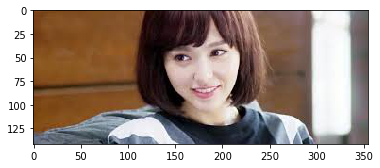

In [10]:
import matplotlib.pylab as plt
img = Image.open("./download.jpeg")
plt.imshow(img)
plt.show()

In [55]:
# 封装函数
def show_images(imgs, num_rows, num_cols, scale=5, classes = None):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [42]:
def apply(img, aug, num_rows=2, num_cols=4, scale=5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

### 实现上下左右翻转

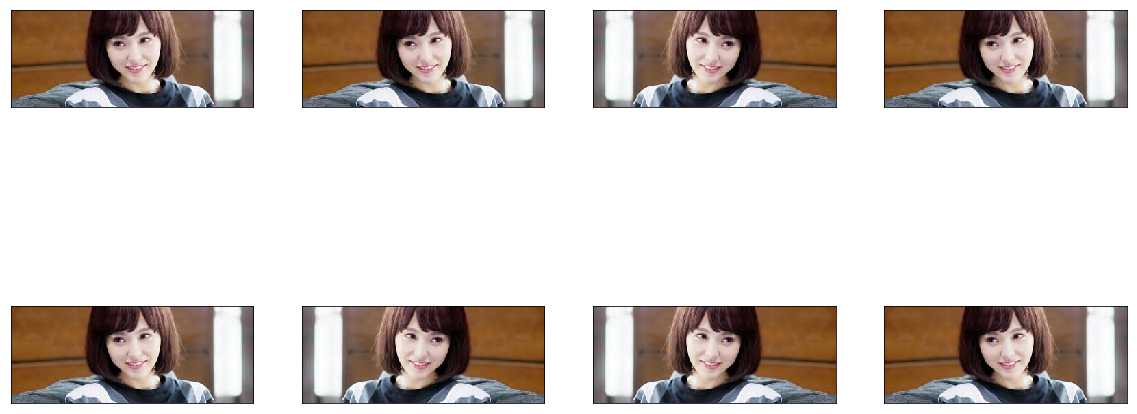

In [43]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

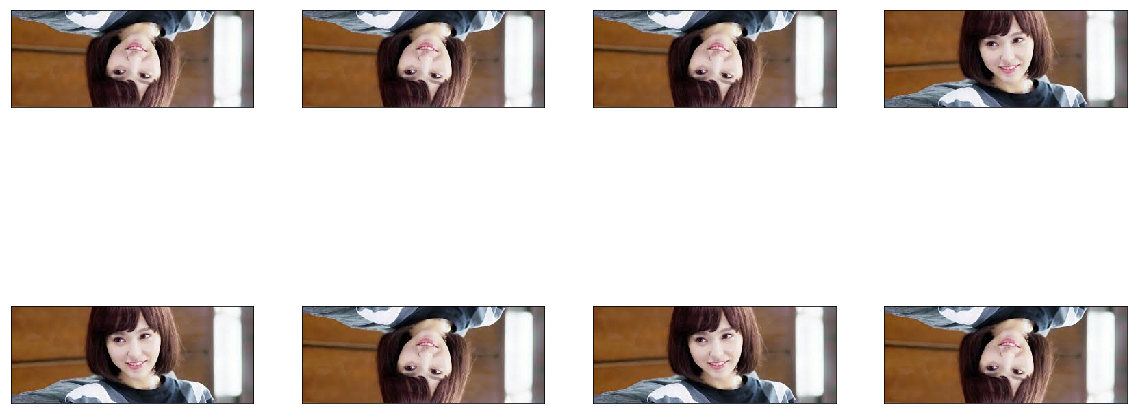

In [44]:
apply(img, torchvision.transforms.RandomVerticalFlip())

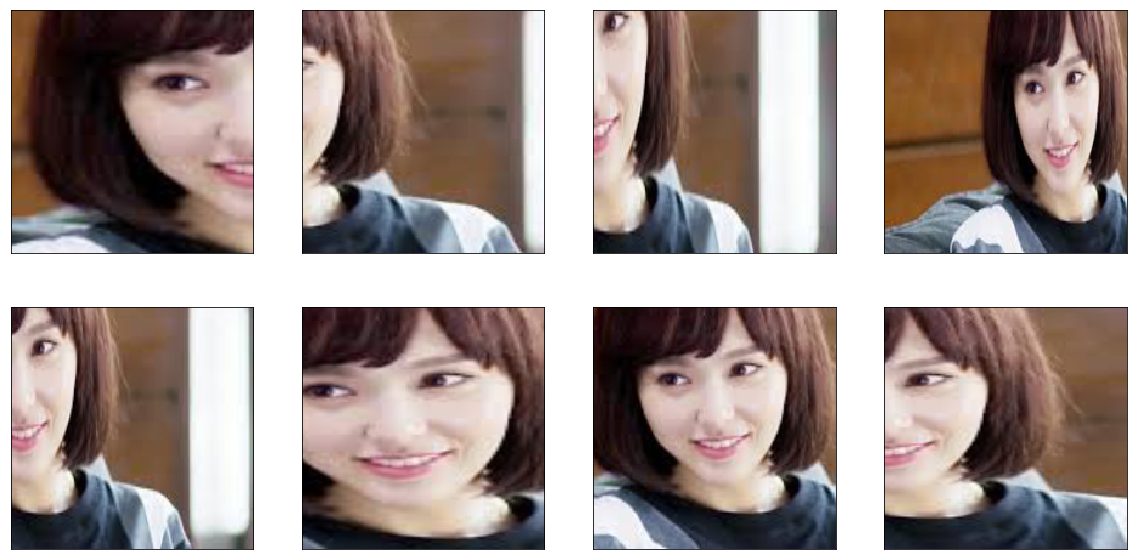

In [45]:
shape_aug = torchvision.transforms.RandomResizedCrop(200, scale=
(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

### 不同亮度调节

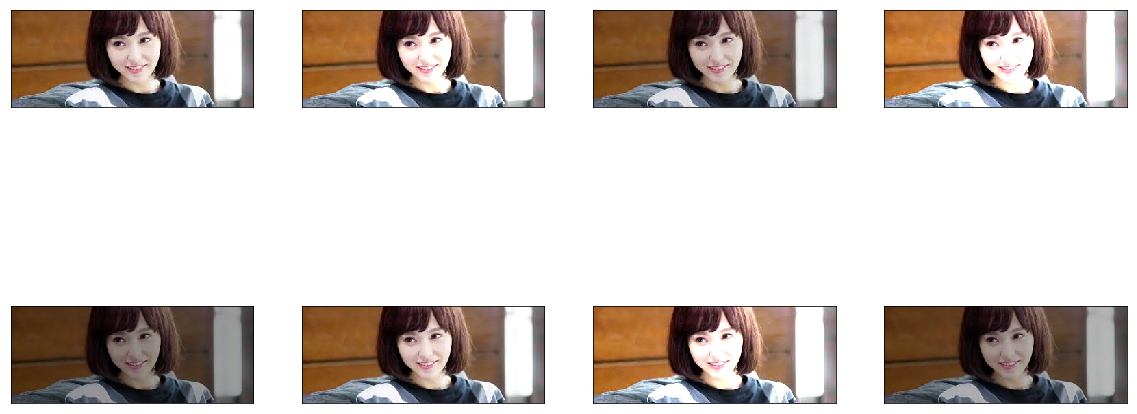

In [46]:
apply(img, torchvision.transforms.ColorJitter(brightness=0.5))

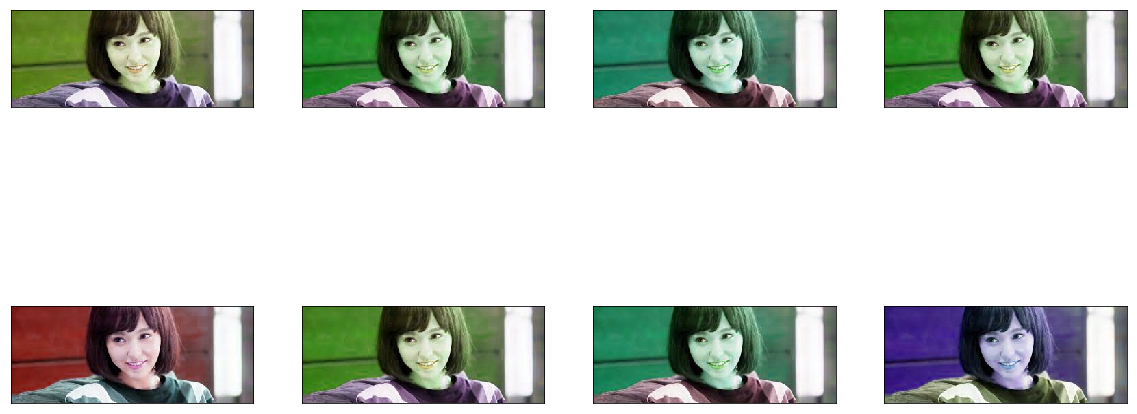

In [47]:
apply(img, torchvision.transforms.ColorJitter(hue=0.5))

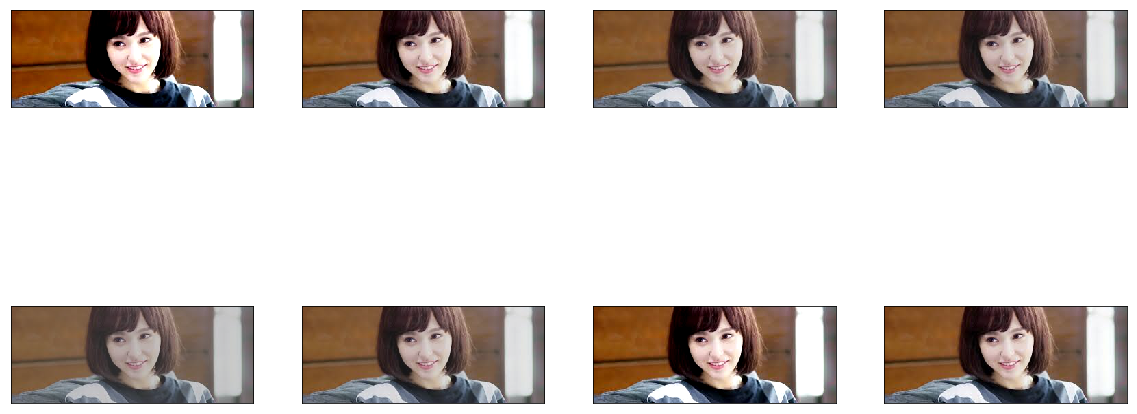

In [48]:
apply(img, torchvision.transforms.ColorJitter(contrast=0.5))

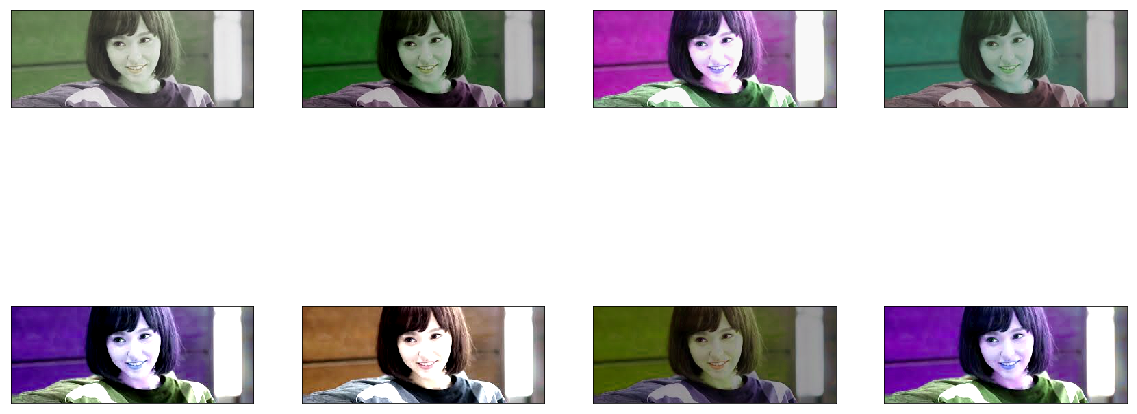

In [49]:
color_aug = torchvision.transforms.ColorJitter(
brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

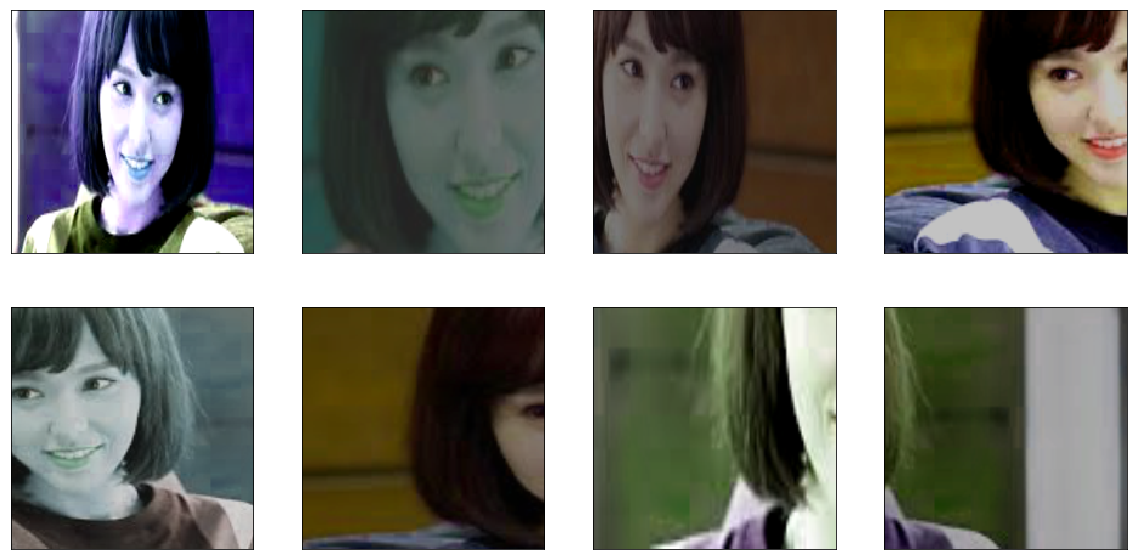

In [50]:
augs = torchvision.transforms.Compose([
                         torchvision.transforms.RandomHorizontalFlip(), color_aug,
                         shape_aug])
apply(img, augs)

In [52]:
all_imgs = torchvision.datasets.CIFAR10(root="/home/gavin/Neural-Network-project/SEnet/data", train=True, download=True)

Files already downloaded and verified


In [54]:
classes = all_imgs.classes

In [56]:
all_imgs[1]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F6E28167B38>, 9)

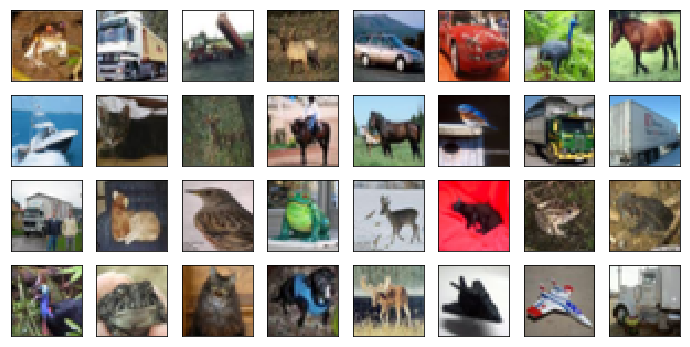

In [60]:
show_images([all_imgs[i][0] for i in range(32)], 4, 8, scale=1.5);